### Import libraries

In [ ]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Load the dataset

In [2]:
data_dir = './archive'
data_dir = pathlib.Path(data_dir)
list(data_dir.glob('*/*.jpg'))

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

245

In [6]:
yes = list(data_dir.glob('yes/*'))
yes[:5]

[WindowsPath('archive/yes/Y1.jpg'),
 WindowsPath('archive/yes/Y10.jpg'),
 WindowsPath('archive/yes/Y100.JPG'),
 WindowsPath('archive/yes/Y101.jpg'),
 WindowsPath('archive/yes/Y102.jpg')]

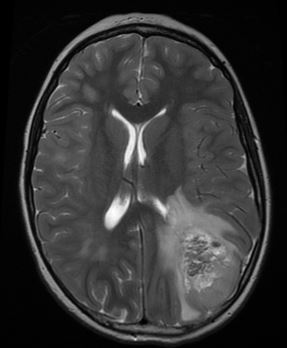

In [7]:
PIL.Image.open(str(yes[2]))

In [8]:
no = list(data_dir.glob('no/*'))
no[:5]

[WindowsPath('archive/no/1 no.jpeg'),
 WindowsPath('archive/no/10 no.jpg'),
 WindowsPath('archive/no/11 no.jpg'),
 WindowsPath('archive/no/12 no.jpg'),
 WindowsPath('archive/no/13 no.jpg')]

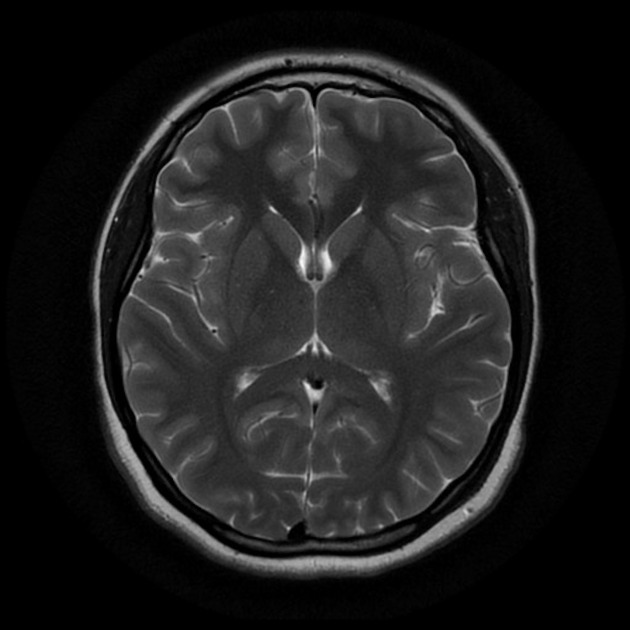

In [9]:
PIL.Image.open(str(no[0]))

### Data preprocessing

In [10]:
BT_images_dict = {
    'no': list(data_dir.glob('no/*')),
    'yes': list(data_dir.glob('yes/*')),
}

In [11]:
BT_labels_dict = {
    'no': 0,
    'yes': 1,
}

In [12]:
BT_images_dict['yes'][:5]

[WindowsPath('archive/yes/Y1.jpg'),
 WindowsPath('archive/yes/Y10.jpg'),
 WindowsPath('archive/yes/Y100.JPG'),
 WindowsPath('archive/yes/Y101.jpg'),
 WindowsPath('archive/yes/Y102.jpg')]

In [13]:
img = cv2.imread(str(BT_images_dict['no'][0]))
img               #cv2 convert image into 3D array

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [14]:
img.shape

(630, 630, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [106]:
X,y = [],[]

for BT_Status,images in BT_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(BT_labels_dict[BT_Status])

In [107]:
X = np.array(X)
y = np.array(y)

### Data split

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [109]:
len(X_train)

189

In [110]:
len(X_test)

64

**Preprocessing: scale images**

In [111]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [112]:
len(X_train_scaled)

189

## Improve Test Accuracy Using Data Augmentation

In [113]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"), 
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

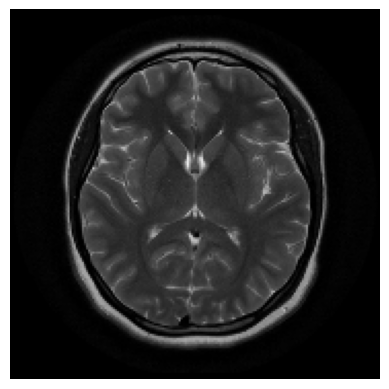

In [114]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

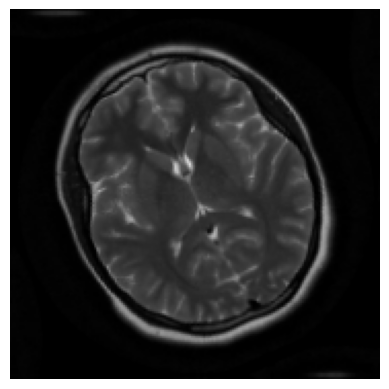

In [115]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

**Train the model using data augmentation and a drop out layer**

In [30]:
num_classes = 2

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
6/6 [==============================] - 4s 253ms/step - loss: 0.7832 - accuracy: 0.4550
Epoch 2/20
6/6 [==============================] - 2s 251ms/step - loss: 0.6616 - accuracy: 0.7354
Epoch 3/20
6/6 [==============================] - 1s 246ms/step - loss: 0.6175 - accuracy: 0.7354
Epoch 4/20
6/6 [==============================] - 2s 252ms/step - loss: 0.5696 - accuracy: 0.7407
Epoch 5/20
6/6 [==============================] - 1s 248ms/step - loss: 0.5671 - accuracy: 0.7196
Epoch 6/20
6/6 [==============================] - 2s 253ms/step - loss: 0.5569 - accuracy: 0.7302
Epoch 7/20
6/6 [==============================] - 2s 258ms/step - loss: 0.5422 - accuracy: 0.7513
Epoch 8/20
6/6 [==============================] - 1s 246ms/step - loss: 0.5161 - accuracy: 0.7619
Epoch 9/20
6/6 [==============================] - 2s 259ms/step - loss: 0.5344 - accuracy: 0.7460
Epoch 10/20
6/6 [==============================] - 2s 260ms/step - loss: 0.4905 - accuracy: 0.7778
Epoch 11/20
6/6 [==

In [31]:
model.evaluate(X_test_scaled,y_test)

2/2 [==============================] - 0s 65ms/step - loss: 0.3488 - accuracy: 0.8438


[0.34875133633613586, 0.84375]

# VGG16

In [116]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

In [117]:
IMAGE_SIZE = [180,180]

In [118]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [119]:
for layer in vgg16.layers:
    layer.trainable = False

In [120]:
x = Flatten()(vgg16.output)

In [121]:
prediction = Dense(2, activation='softmax')(x)
# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [122]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0   

In [127]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='Adam',
  metrics=['accuracy']
)


In [128]:
tf.config.run_functions_eagerly(True)

In [125]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [129]:
r = model.fit(X_train_scaled, y_train,validation_data=(X_test_scaled, y_test),epochs=30)

Epoch 1/30
6/6 [==============================] - 57s 10s/step - loss: 3.0097 - accuracy: 0.5979 - val_loss: 0.4245 - val_accuracy: 0.9375
Epoch 2/30
6/6 [==============================] - 59s 10s/step - loss: 1.1492 - accuracy: 0.8095 - val_loss: 1.2180 - val_accuracy: 0.8125
Epoch 3/30
6/6 [==============================] - 59s 10s/step - loss: 1.1360 - accuracy: 0.8148 - val_loss: 0.4178 - val_accuracy: 0.9219
Epoch 4/30
6/6 [==============================] - 59s 10s/step - loss: 0.4829 - accuracy: 0.8677 - val_loss: 0.6699 - val_accuracy: 0.7812
Epoch 5/30
6/6 [==============================] - 60s 10s/step - loss: 0.5772 - accuracy: 0.8519 - val_loss: 0.5391 - val_accuracy: 0.8594
Epoch 6/30
6/6 [==============================] - 60s 10s/step - loss: 0.3268 - accuracy: 0.8836 - val_loss: 0.3523 - val_accuracy: 0.9062
Epoch 7/30
6/6 [==============================] - 60s 10s/step - loss: 0.2995 - accuracy: 0.9101 - val_loss: 0.3303 - val_accuracy: 0.9062
Epoch 8/30
6/6 [===========

In [130]:
import pickle
#Saving model 
model.save('modelvgg16')

INFO:tensorflow:Assets written to: modelvgg16\assets


INFO:tensorflow:Assets written to: modelvgg16\assets


In [131]:
from tensorflow import keras
mlA=keras.models.load_model('modelvgg16')


In [132]:
mlA.predict(X_test_scaled)

c:\Users\12896\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


2/2 [==============================] - 3s 2s/step


array([[5.49114542e-04, 9.99450862e-01],
       [9.99993443e-01, 6.54988798e-06],
       [2.50666868e-03, 9.97493386e-01],
       [4.19487834e-01, 5.80512226e-01],
       [1.53479432e-05, 9.99984622e-01],
       [1.10292631e-05, 9.99988914e-01],
       [2.72434633e-02, 9.72756565e-01],
       [1.22561203e-02, 9.87743914e-01],
       [9.63603854e-01, 3.63961086e-02],
       [8.49381924e-01, 1.50618032e-01],
       [4.79090996e-02, 9.52090859e-01],
       [2.20552646e-03, 9.97794509e-01],
       [4.00793590e-02, 9.59920585e-01],
       [1.05350104e-03, 9.98946488e-01],
       [1.34489015e-02, 9.86551046e-01],
       [9.99881983e-01, 1.18035074e-04],
       [6.43858357e-06, 9.99993563e-01],
       [3.87551903e-04, 9.99612510e-01],
       [1.21128814e-05, 9.99987841e-01],
       [9.94215190e-01, 5.78481052e-03],
       [3.53887305e-02, 9.64611292e-01],
       [9.93651450e-01, 6.34854613e-03],
       [4.21077479e-03, 9.95789230e-01],
       [1.07780630e-02, 9.89221931e-01],
       [2.226024

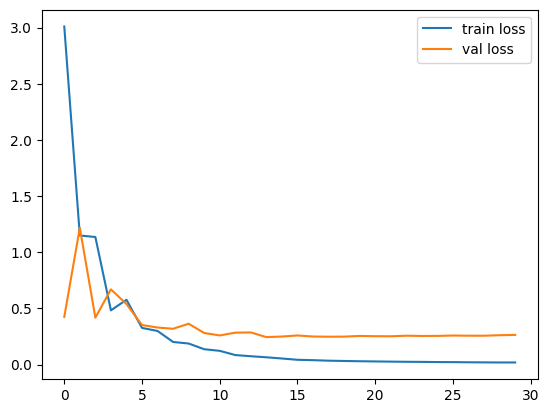

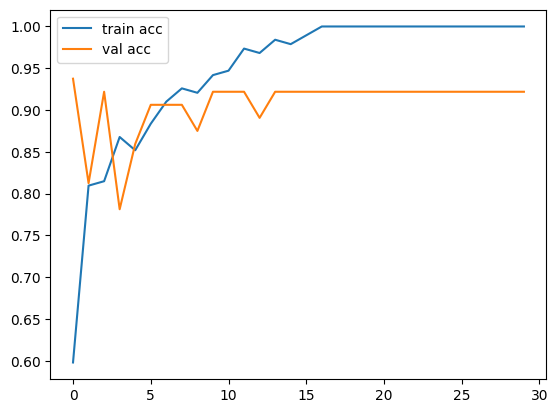

<Figure size 640x480 with 0 Axes>

In [133]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

2/2 [==============================] - 3s 2s/step


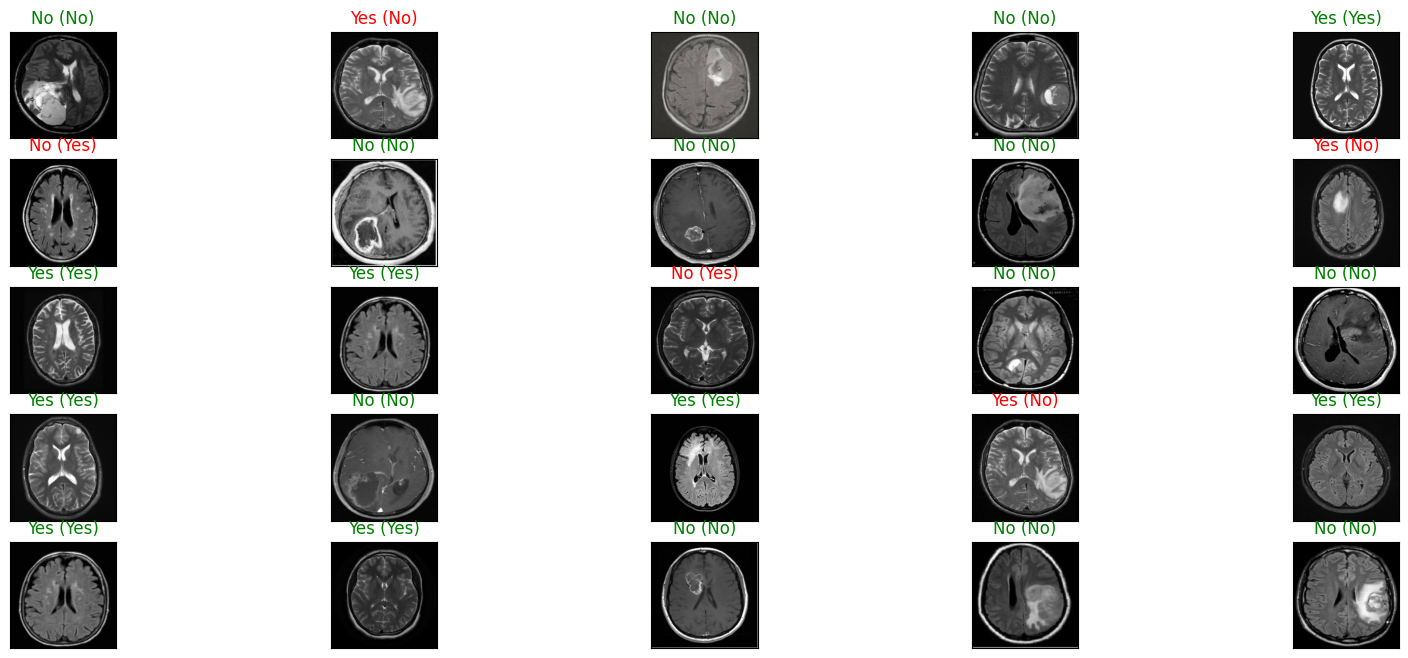

In [134]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

y_hat = mlA.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=25, replace=False)):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [ ]:
ans=mlA.predict(X_test)
ans

array([[3.42373559e-22, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [8.46161974e-10, 1.00000000e+00],
       [5.53941337e-20, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [4.36920766e-03, 9.95630860e-01],
       [8.66020553e-35, 1.00000000e+00],
       [1.00000000e+00, 3.68284940e-25],
       [1.00000000e+00, 3.96280608e-24],
       [1.28612646e-33, 1.00000000e+00],
       [1.17612712e-24, 1.00000000e+00],
       [2.60628426e-08, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.97135997e-01, 2.86395545e-03],
       [1.00000000e+00, 1.00169495e-23],
       [7.64262185e-38, 1.00000000e+00],
       [2.98915671e-27, 1.00000000e+00],
       [1.18448905e-30, 1.00000000e+00],
       [1.00000000e+00, 1.36044344e-17],
       [3.59933737e-31, 1.00000000e+00],
       [1.00000000e+00, 1.30825944e-34],
       [2.35263531e-10, 1.00000000e+00],
       [2.45262040e-20, 1.00000000e+00],
       [1.000000

# Resnet

In [135]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [136]:
IMAGE_SIZE = [180,180]

In [137]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [138]:
for layer in resnet.layers:
    layer.trainable = False

In [139]:
x = Flatten()(resnet.output)

In [140]:
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [141]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']       

In [142]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [143]:
tf.config.run_functions_eagerly(True)

In [144]:
r = model.fit(X_train_scaled, y_train,validation_data=(X_test_scaled, y_test),epochs=30)

Epoch 1/30
6/6 [==============================] - 29s 5s/step - loss: 5.8397 - accuracy: 0.4603 - val_loss: 1.9459 - val_accuracy: 0.4844
Epoch 2/30
6/6 [==============================] - 29s 5s/step - loss: 1.5213 - accuracy: 0.6243 - val_loss: 2.2654 - val_accuracy: 0.4844
Epoch 3/30
6/6 [==============================] - 28s 5s/step - loss: 1.5521 - accuracy: 0.6402 - val_loss: 0.5750 - val_accuracy: 0.7500
Epoch 4/30
6/6 [==============================] - 29s 5s/step - loss: 0.9946 - accuracy: 0.7090 - val_loss: 0.8377 - val_accuracy: 0.7812
Epoch 5/30
6/6 [==============================] - 29s 5s/step - loss: 0.7480 - accuracy: 0.7566 - val_loss: 0.6822 - val_accuracy: 0.7969
Epoch 6/30
6/6 [==============================] - 31s 5s/step - loss: 0.8340 - accuracy: 0.6667 - val_loss: 0.4990 - val_accuracy: 0.8594
Epoch 7/30
6/6 [==============================] - 34s 6s/step - loss: 0.5398 - accuracy: 0.7672 - val_loss: 0.5271 - val_accuracy: 0.8281
Epoch 8/30
6/6 [==================

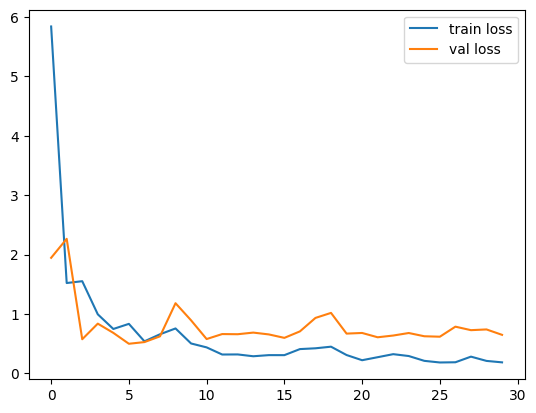

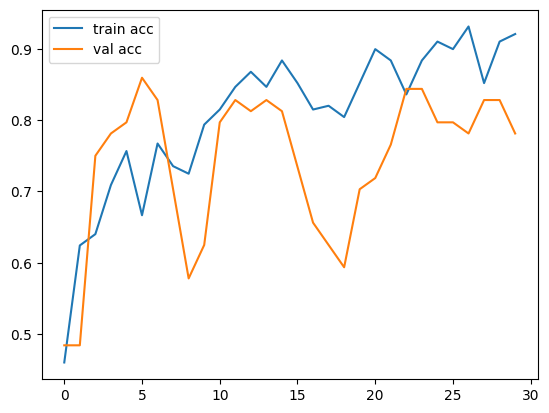

<Figure size 640x480 with 0 Axes>

In [145]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [146]:
#Saving model 
model.save('Resnet')
mlA=keras.models.load_model('Resnet')
mlA.predict(X_test_scaled)

INFO:tensorflow:Assets written to: Resnet\assets


INFO:tensorflow:Assets written to: Resnet\assets
c:\Users\12896\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


2/2 [==============================] - 2s 1s/step


array([[1.48197608e-02, 9.85180259e-01],
       [3.86888981e-01, 6.13111019e-01],
       [1.04891896e-01, 8.95108163e-01],
       [9.53332365e-01, 4.66676578e-02],
       [1.13256657e-02, 9.88674343e-01],
       [1.44073796e-02, 9.85592544e-01],
       [2.81612948e-02, 9.71838772e-01],
       [8.68055969e-02, 9.13194358e-01],
       [8.39917004e-01, 1.60083026e-01],
       [3.45208615e-01, 6.54791355e-01],
       [7.28994682e-02, 9.27100539e-01],
       [1.76230855e-02, 9.82376933e-01],
       [4.55741138e-05, 9.99954462e-01],
       [5.58694661e-01, 4.41305399e-01],
       [3.71562868e-01, 6.28437161e-01],
       [7.80602872e-01, 2.19397202e-01],
       [2.43820297e-03, 9.97561812e-01],
       [2.14676708e-02, 9.78532314e-01],
       [5.44146309e-03, 9.94558513e-01],
       [8.85657251e-01, 1.14342764e-01],
       [1.81567639e-01, 8.18432331e-01],
       [9.07214522e-01, 9.27855149e-02],
       [4.61299047e-02, 9.53870058e-01],
       [1.30461417e-02, 9.86953795e-01],
       [3.821723

2/2 [==============================] - 3s 1s/step


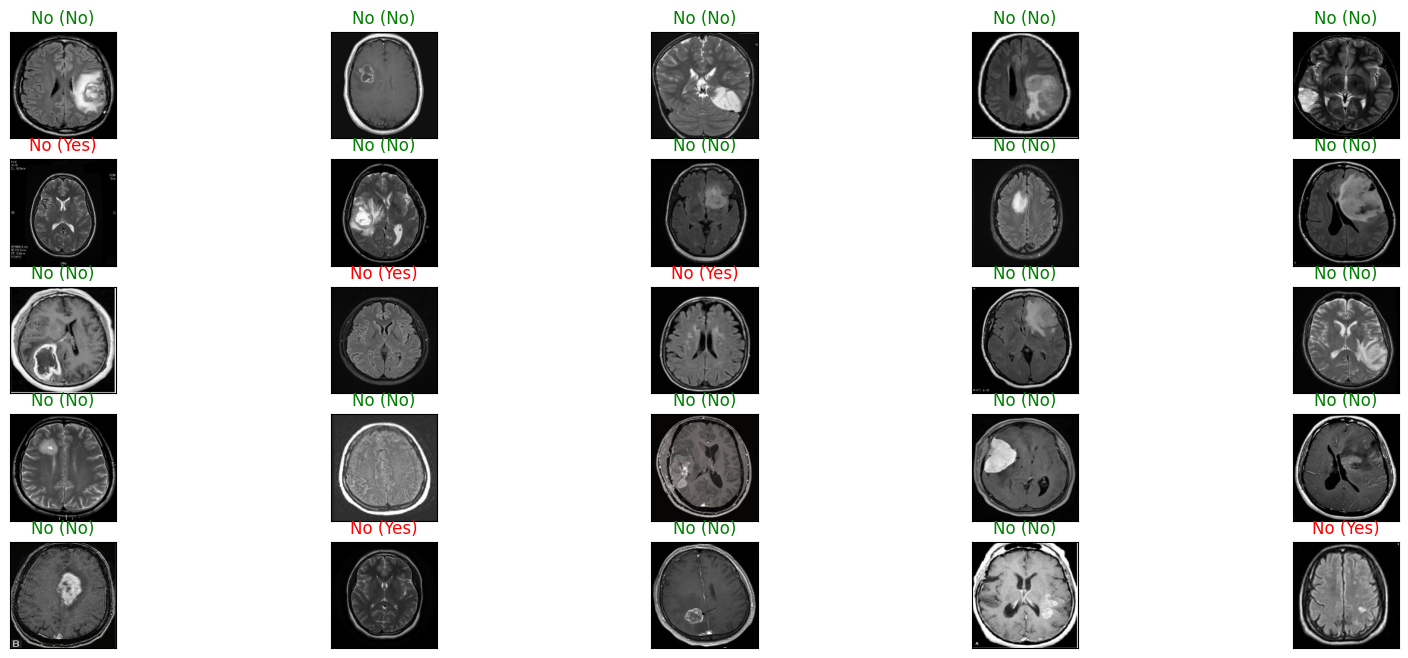

In [147]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

y_hat = mlA.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=25, replace=False)):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()